In [2]:
from PIL import Image
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

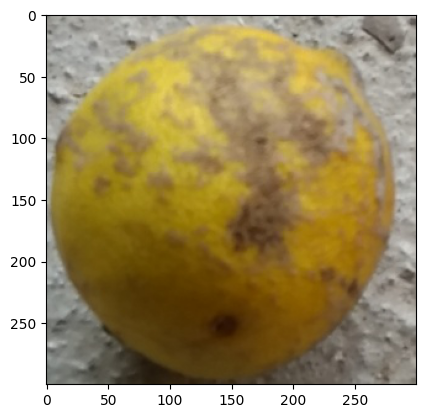

In [3]:
img=cv2.imread('lemon_dataset/bad_quality/bad_quality_758.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

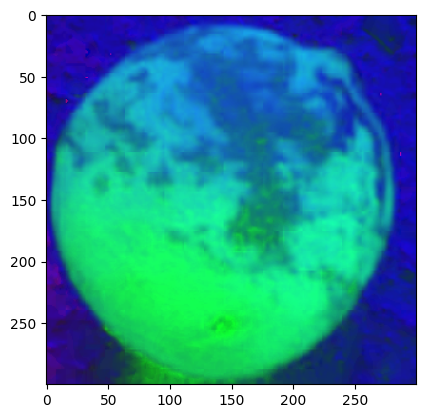

In [4]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

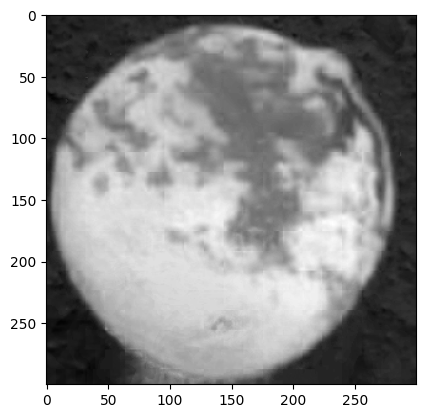

In [5]:
gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

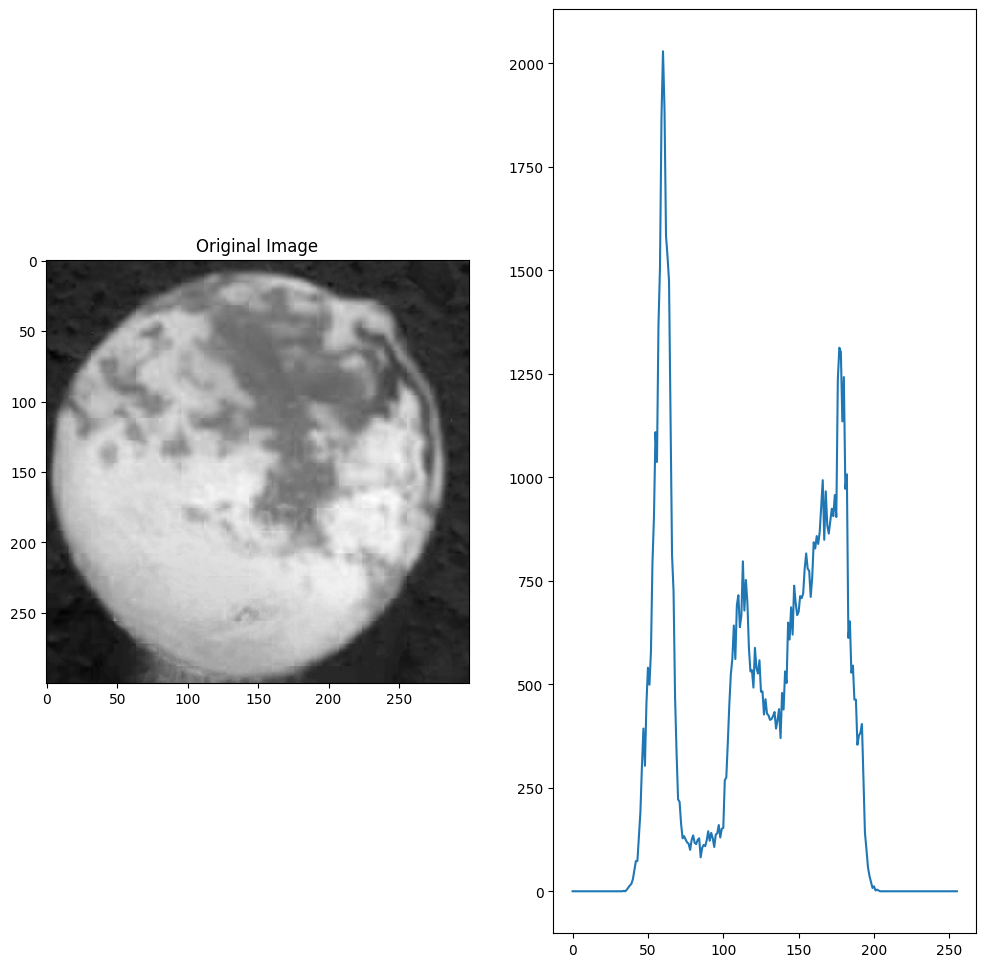

In [6]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

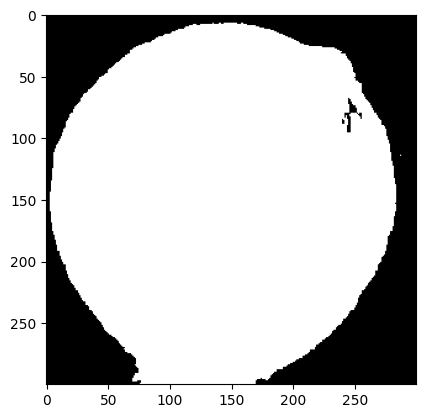

In [7]:
ret,th = cv2.threshold(gray_img,80,200,cv2.THRESH_BINARY)
plt.imshow(th, cmap='gray')

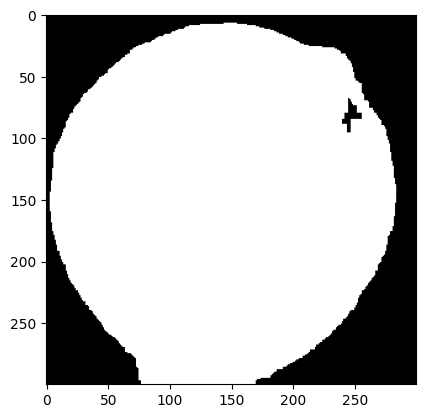

In [8]:
kernel = np.ones((3, 3),)
fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=4)
plt.imshow(fnal, cmap='gray')



In [9]:
white_pixel_count = cv2.countNonZero(fnal)
print(f"Number of white pixels: {white_pixel_count}")

Number of white pixels: 64049


Text(0.5, 1.0, 'Image with Mask Applied')

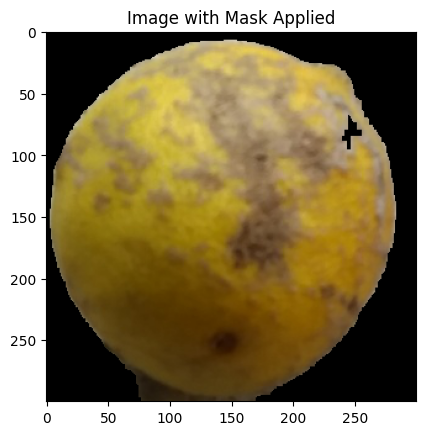

In [10]:
noBackground= cv2.bitwise_and(img, img, mask=fnal)
plt.imshow(cv2.cvtColor(noBackground, cv2.COLOR_BGR2RGB))
plt.title('Image with Mask Applied')

In [11]:
noBackgroundHSV = cv2.cvtColor(noBackground, cv2.COLOR_BGR2HSV)

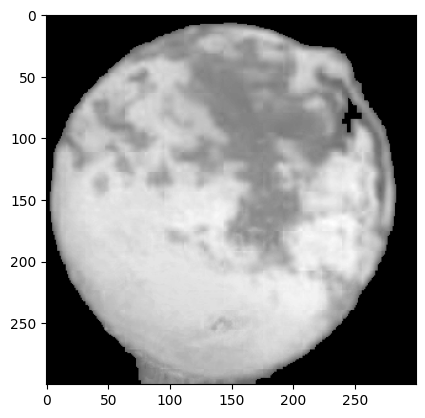

In [12]:
gray_crop = cv2.cvtColor(noBackgroundHSV, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_crop, cmap='gray')


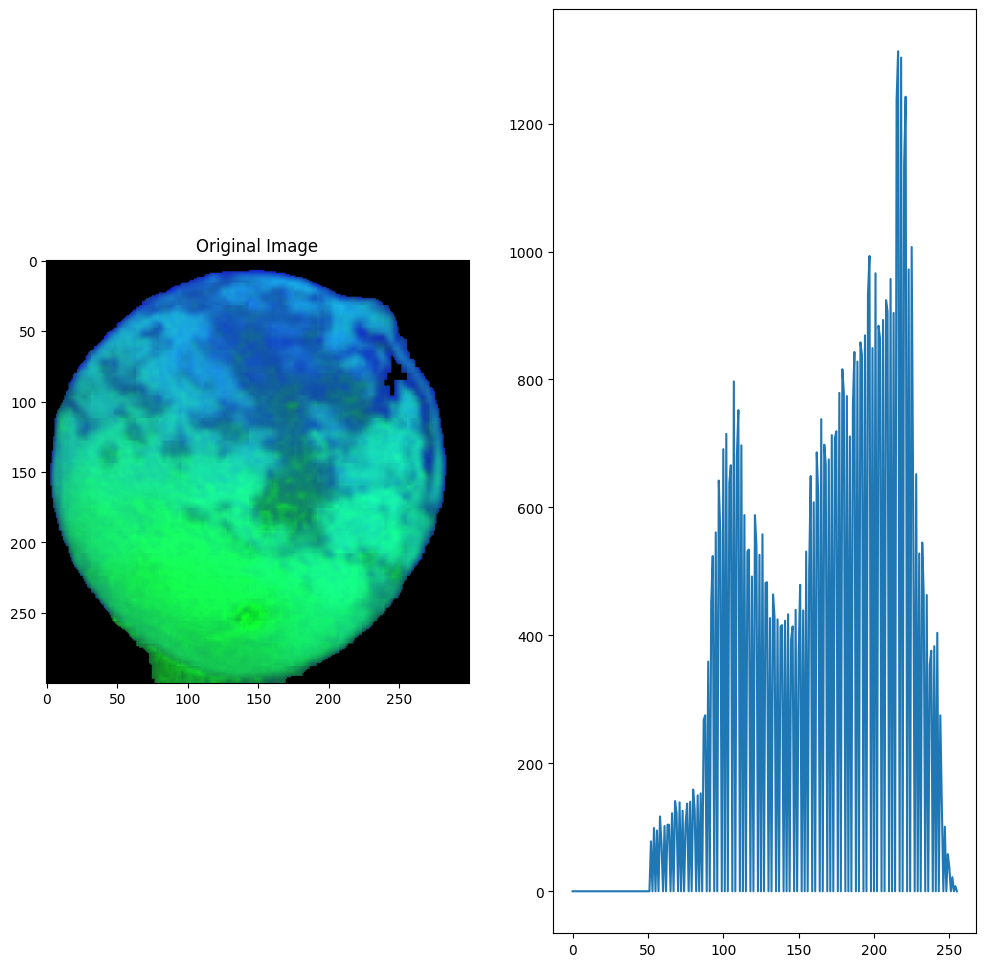

In [13]:
hist = cv2.calcHist([gray_crop], [0], None, [256], [50, 200])
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(noBackground, cv2.COLOR_BGR2HSV), cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

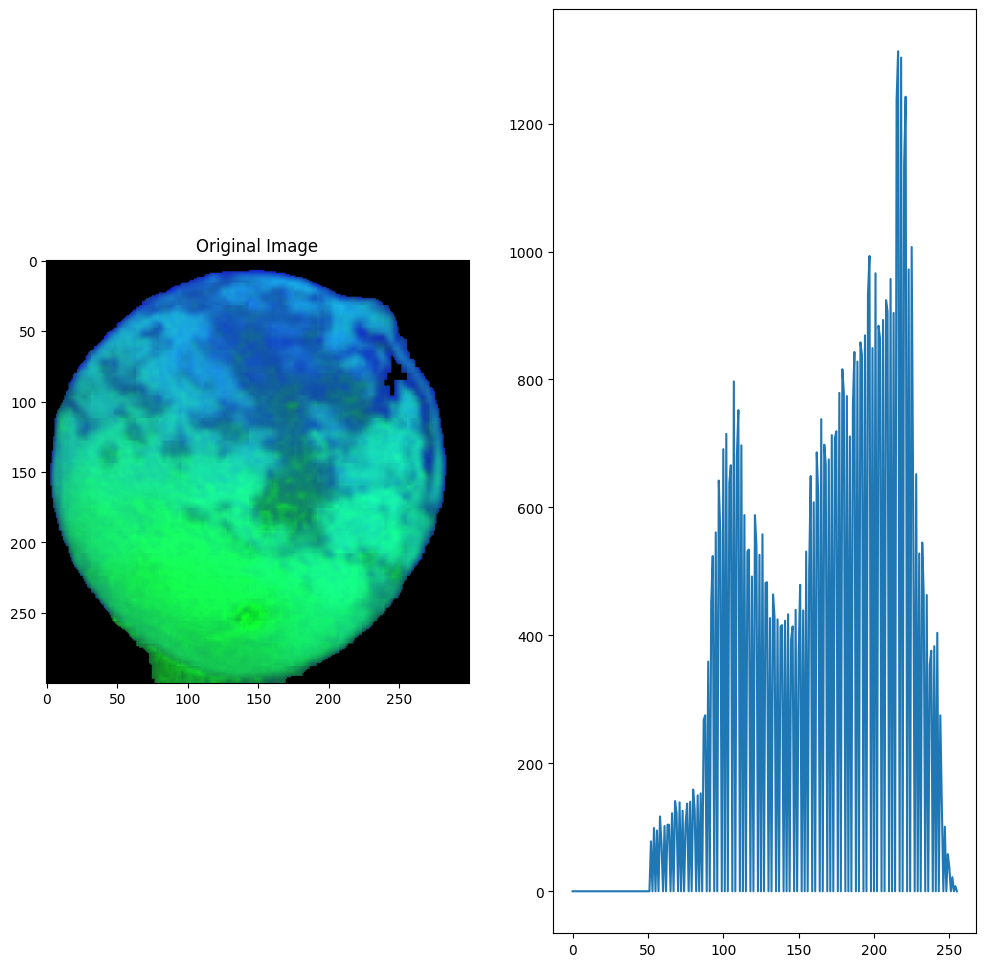

In [ ]:
hist = cv2.calcHist([gray_crop], [0], None, [256], [50, 200])
plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(noBackground, cv2.COLOR_BGR2HSV), cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.plot(hist)

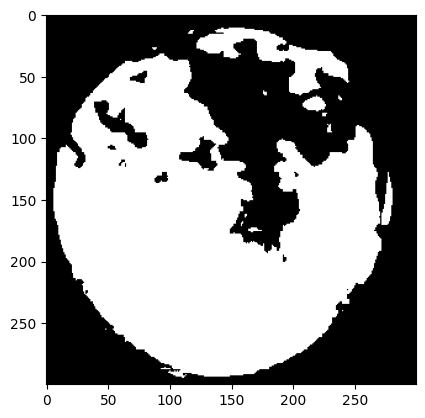

In [14]:
_,th2 = cv2.threshold(gray_img,130,200,cv2.THRESH_BINARY)
plt.imshow(th2, cmap='gray')

In [15]:
yellow_pixel_count = cv2.countNonZero(th2)
print(f"Number of yellow pixels: {yellow_pixel_count}")

Number of yellow pixels: 45312


In [16]:
badPixels= white_pixel_count-yellow_pixel_count
badPercentage = (badPixels/white_pixel_count)*100
print(f"Porcentaje de daño: {badPercentage}%")


Porcentaje de daño: 29.254164780090242%


In [17]:
def clasificacion(path):
    img=cv2.imread(path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gray_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2GRAY)
    ret,th = cv2.threshold(gray_img,80,200,cv2.THRESH_BINARY)
    kernel = np.ones((3, 3),)
    fnal= cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=4)
    white_pixel_count = cv2.countNonZero(fnal)
    noBackground= cv2.bitwise_and(img, img, mask=fnal)
    noBackgroundHSV = cv2.cvtColor(noBackground, cv2.COLOR_BGR2HSV)
    gray_crop = cv2.cvtColor(noBackgroundHSV, cv2.COLOR_BGR2GRAY)
    _,th2 = cv2.threshold(gray_img,130,200,cv2.THRESH_BINARY)
    yellow_pixel_count = cv2.countNonZero(th2)
    badPixels= white_pixel_count-yellow_pixel_count
    badPercentage = (badPixels/white_pixel_count)*100

    if badPercentage > 30:
        print('Limón de mala calidad')
    else:
        print('Limón de buena calidad')
    
    return badPercentage

In [18]:
clasificacion('lemon_dataset/bad_quality/bad_quality_0.jpg')

Limón de mala calidad


59.545945376491346

In [19]:
import os
dataset_path='lemon_dataset'
good_quality_path = os.path.join(dataset_path, 'good_quality')
bad_quality_path = os.path.join(dataset_path, 'bad_quality')
dfGood = pd.DataFrame(columns=['Image', 'percentage'])
dfBad = pd.DataFrame(columns=['Image', 'percentage'])

def classify_images_in_folder(folder_path, df):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            x=clasificacion(image_path)
            df.loc[len(df)] = [filename, x]
            
            




classify_images_in_folder(good_quality_path,dfGood)
classify_images_in_folder(bad_quality_path,dfBad)



Limón de buena calidad
Limón de mala calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de mala calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de mala calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de mala calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de mala calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de buena calidad
Limón de mala calidad
Limón de buena ca

In [20]:
dfGood

,Image,percentage
0,good_quality_516.jpg,12.710151
1,good_quality_522.jpg,49.948180
2,good_quality_345.jpg,7.685887
3,good_quality_524.jpg,7.496861
4,good_quality_133.jpg,29.342836
...,...,...
1120,good_quality_918.jpg,11.358423
1121,good_quality_956.jpg,9.413082
1122,good_quality_813.jpg,9.096608
1123,good_quality_306.jpg,8.667455


In [21]:
over30 = dfGood[dfGood['percentage'] > 30].shape[0]
badLemon = (over30 / dfGood.shape[0]) * 100

print(f"Count of values over 30: {over30}")
print(f"Percentage of values over 30: {badLemon:.2f}%")

Count of values over 30: 121
Percentage of values over 30: 10.76%


In [22]:
dfBad

,Image,percentage
0,bad_quality_389.jpg,12.145967
1,bad_quality_59.jpg,46.911092
2,bad_quality_784.jpg,14.594712
3,bad_quality_807.jpg,33.267793
4,bad_quality_461.jpg,37.771658
...,...,...
946,bad_quality_583.jpg,50.755760
947,bad_quality_112.jpg,9.205747
948,bad_quality_293.jpg,14.489915
949,bad_quality_505.jpg,12.048980


In [23]:
over30 = dfBad[dfBad['percentage'] > 30].shape[0]
badLemon = (over30 / dfBad.shape[0]) * 100

print(f"Count of values over 30: {over30}")
print(f"Percentage of values over 30: {badLemon:.2f}%")

Count of values over 30: 358
Percentage of values over 30: 37.64%
